In [1]:
from CT_DeepNet import *
#from runCT import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

In [2]:
ResultsTrace = pd.read_pickle("ResultsTrace.pkl")
ResultsTraceNeuron = pd.read_pickle("ResultsTraceNeuron.pkl")
ResultsSearchTrace = pd.read_pickle("ResultsSearchTrace.pkl")
ResultsSearchTraceNeuron = pd.read_pickle("ResultsSearchTraceNeuron.pkl")

# Behavioral

Convergence results for the Trace task

In [5]:
ResultsTrace[ResultsTrace['TimeToConverge']<150000][['TimeToConverge']].describe()

,TimeToConverge
count,78.000000
mean,46027.525641
std,28037.657708
min,18002.000000
25%,28001.000000
50%,36001.500000
75%,55501.250000
max,140003.000000


In [105]:
len(ResultsTrace[ResultsTrace['Converged5'] == True]) / len(ResultsTrace)

0.9130434782608695

Convergence results for the Search then trace task

In [6]:
ResultsSearchTrace[ResultsSearchTrace['TimeToConverge']<175000][['TimeToConverge']].describe()

,TimeToConverge
count,69.000000
mean,91421.753623
std,26575.225283
min,40002.000000
25%,72001.000000
50%,86002.000000
75%,106002.000000
max,164001.000000


In [106]:
len(ResultsSearchTrace[ResultsSearchTrace['Converged5'] == True]) / len(ResultsSearchTrace)

0.8043478260869565

## Generalization across training

/users/bp000418/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


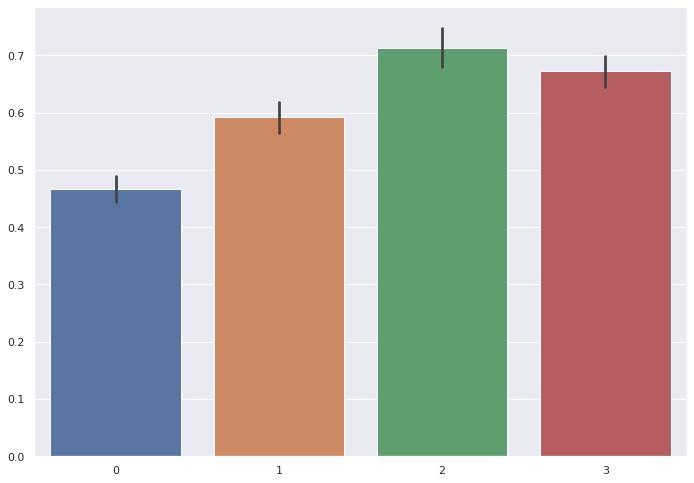

In [45]:
Y = []
X = []
Gene1 = []
Gene2 = []
Gene3 = []
Gene4 = []
for i in range(len(ResultsTrace)):
    if ResultsTrace['TimeToConverge'][i]<150000:
        for p in range(4):
            Y.append(ResultsTrace['Generalization'][i][p])
            X.append(p)
            if p == 0:
                Gene1.append(ResultsTrace['Generalization'][i][p])
            if p == 1:
                Gene2.append(ResultsTrace['Generalization'][i][p])
            if p == 2:
                Gene3.append(ResultsTrace['Generalization'][i][p])
            if p == 3:
                Gene4.append(ResultsTrace['Generalization'][i][p])
            
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(X,Y)            

/users/bp000418/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


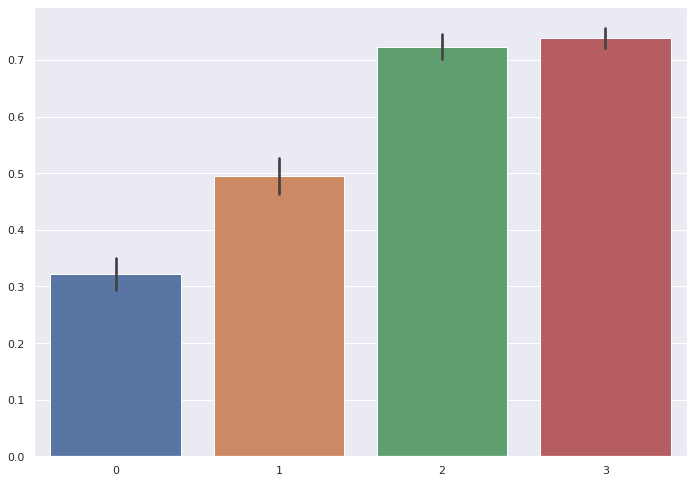

In [4]:
Y = []
X = []
Gene1 = []
Gene2 = []
Gene3 = []
Gene4 = []
for i in range(len(ResultsSearchTrace)):
    if ResultsSearchTrace['TimeToConverge'][i]<175000:
        for p in range(4):
            Y.append(ResultsSearchTrace['Generalization'][i][p])
            X.append(p)
            if p == 0:
                Gene1.append(ResultsSearchTrace['Generalization'][i][p])
            if p == 1:
                Gene2.append(ResultsSearchTrace['Generalization'][i][p])
            if p == 2:
                Gene3.append(ResultsSearchTrace['Generalization'][i][p])
            if p == 3:
                Gene4.append(ResultsSearchTrace['Generalization'][i][p])
            
sns.set(rc={'figure.figsize':(11.7,8.27)})
generalization = sns.barplot(X,Y)            

In [10]:
generalization.figure.savefig("Generalization.eps")

# Neuronal

## Exemple plots

<Figure size 432x720 with 0 Axes>

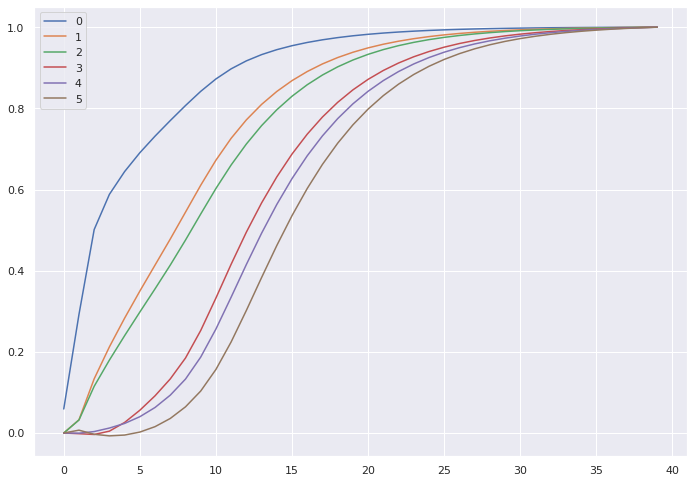

In [12]:
plt.figure(figsize=(6,10))
example_plot = plt.figure()
for l in range(6):
    plt.plot(np.mean(ResultsTraceNeuron['SaveXmod'][37][l],axis=0)/np.max(np.abs(np.mean(ResultsTraceNeuron['SaveXmod'][37][l],axis=0))))    
plt.legend([str(i) for i in range(6)])

In [14]:
example_plot.savefig("Example.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x720 with 0 Axes>

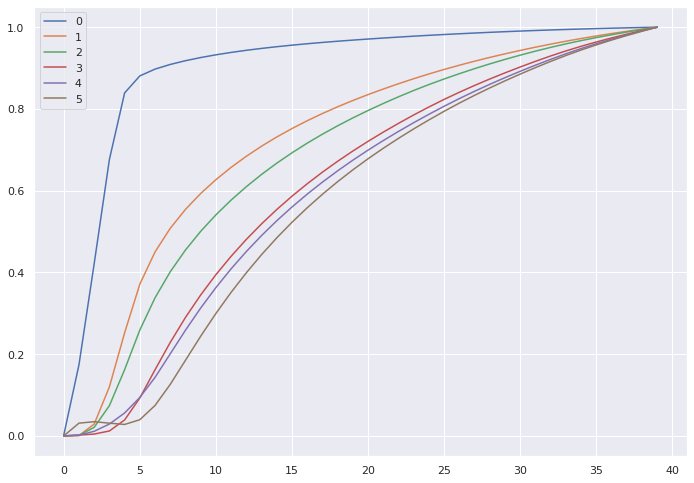

In [5]:
plt.figure(figsize=(6,10))
example_plot_TC = plt.figure()
for l in range(6):
    plt.plot(np.mean(ResultsSearchTraceNeuron['SaveXmod'][0][l],axis=0)/np.max(np.abs(np.mean(ResultsSearchTraceNeuron['SaveXmod'][0][l],axis=0))))    
plt.legend([str(i) for i in range(6)])

In [6]:
example_plot_TC.savefig("ExampleTC.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## Activity propagation

/users/bp000418/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


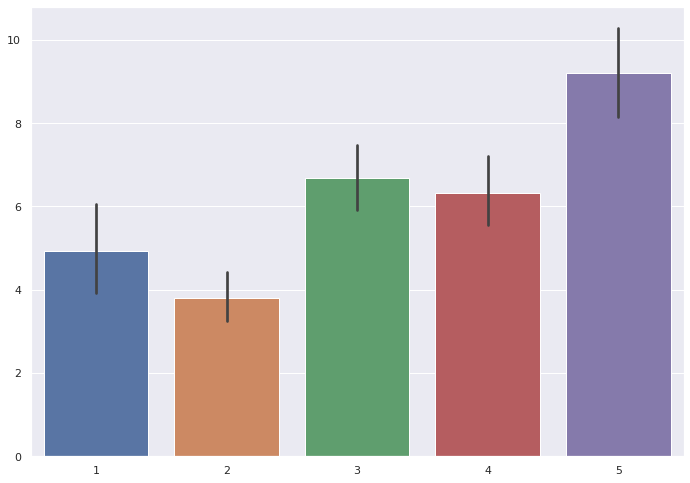

In [16]:
X = []
Y = []
xx = np.linspace(0, 40, num=600)
for k in range(len(ResultsTraceNeuron)):
    if isinstance(ResultsTraceNeuron['Corrects'][k],list):
        interpollated_curves = []   
        mean_normalized_curves = [np.mean(ResultsTraceNeuron['SaveXmod'][k][l],axis=0)/np.max(np.abs(np.mean(ResultsTraceNeuron['SaveXmod'][k][l],axis=0))) for l in range(6)]
        for i in range(6):
            interp = np.interp(xx, np.arange(0,40), mean_normalized_curves[i])
            interpollated_curves.append(interp)

        for i in range(1,6):
            if np.max(interpollated_curves[i])>=0.1:
                Y.append(xx[np.min(np.argwhere(interpollated_curves[i]>=0.1))])
                X.append(i)
                
sns.set(rc={'figure.figsize':(11.7,8.27)})
propagation = sns.barplot(X,Y)   

In [17]:
propagation.figure.savefig("Propagation.eps")

/users/bp000418/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


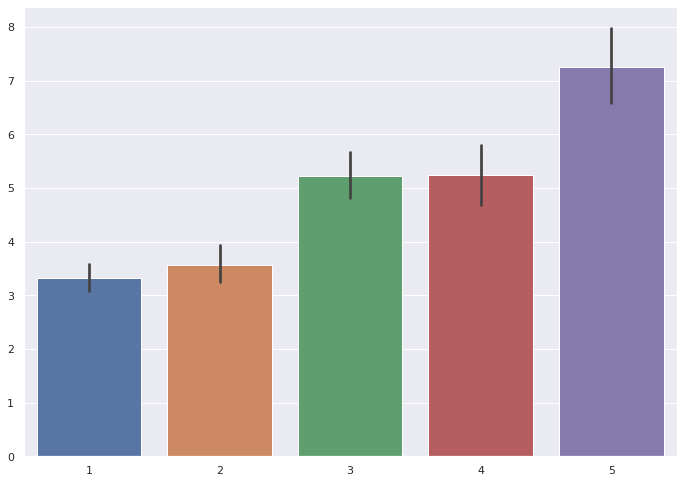

In [88]:
X = []
Y = []
xx = np.linspace(0, 40, num=600)
for k in range(len(ResultsSearchTraceNeuron)):
    if isinstance(ResultsSearchTraceNeuron['Corrects'][k],list):
        interpollated_curves = []   
        mean_normalized_curves = [np.mean(ResultsSearchTraceNeuron['SaveXmod'][k][l],axis=0)/np.max(np.abs(np.mean(ResultsSearchTraceNeuron['SaveXmod'][k][l],axis=0))) for l in range(6)]
        for i in range(6):
            interp = np.interp(xx, np.arange(0,40), mean_normalized_curves[i])
            interpollated_curves.append(interp)

        for i in range(1,6):
            if np.max(interpollated_curves[i])>=0.1:
                Y.append(xx[np.min(np.argwhere(interpollated_curves[i]>=0.1))])
                X.append(i)
                
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(X,Y)   

In [ ]:
stats.ttest_ind(np.array(Y)[np.where(np.array(X) == 1)],np.array(Y)[np.where(np.array(X) == 3)])

## Delay in the activation of the first pixel

/users/bp000418/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


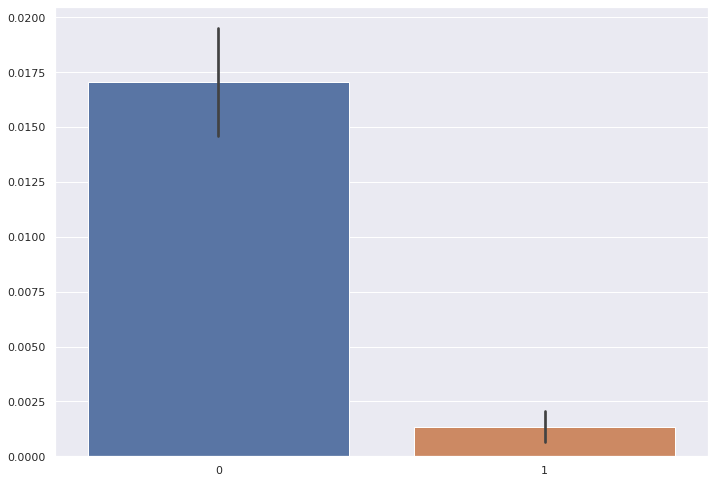

In [8]:
X = []
Y = []
X1 = []
Y1 = []
Pixel = 2
Time = 1
for i in range(len(ResultsTraceNeuron)):
    if isinstance(ResultsTraceNeuron['Corrects'][i],list):
        X.append(0)
        Y.append(np.mean(ResultsTraceNeuron['SaveXmod'][i][Pixel][:,Time]))
        #X.append(0.1)
        #Y.append(np.mean(ResultsTraceNeuron['SaveXmod'][i][Pixel][:,Time+1]))
        
for i in range(len(ResultsSearchTraceNeuron)):
    if isinstance(ResultsSearchTraceNeuron['Corrects'][i],list):
        X.append(1)
        Y.append(np.mean(ResultsSearchTraceNeuron['SaveXmod'][i][Pixel][:,Time]))
        #X.append(1.1)
        #Y.append(np.mean(ResultsSearchTraceNeuron['SaveXmod'][i][Pixel][:,Time+1]))
        
sns.set(rc={'figure.figsize':(11.7,8.27)})
sequence = sns.barplot(X,Y)        

In [10]:
sequence.figure.savefig('sequence.eps')

In [21]:
stats.ttest_ind(np.array(Y)[np.where(np.array(X) == 'Trace')],np.array(Y)[np.where(np.array(X) == 'Search then Trace')])

Ttest_indResult(statistic=-0.8955391281493793, pvalue=0.3719832094471073)

/users/bp000418/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


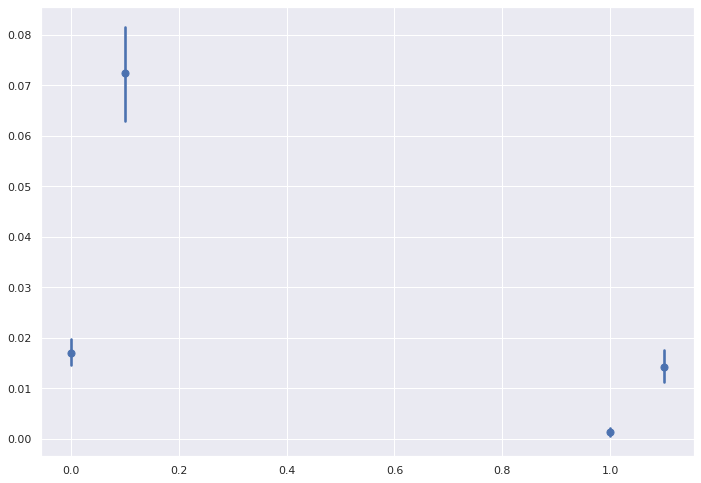

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(X,Y,x_estimator=np.mean,fit_reg = False) 